In [1]:
import sys, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [2]:
def preprocess_data(path,type):
    data_type = []
    c = []
    faces = []
    mean = []
    min = []
    var = []
    max = []
    with open(path,'r') as f:
        for line in f:
            l = line.split(',')
            faces.append(l[0])
            data_type.append(l[1])
            c.append(l[2])
            l[-1] = l[-1].strip('\n')
            arr = np.array(l[3:],dtype=float)

            min.append(np.min(arr))
            max.append(np.max(arr))
            var.append(np.var(arr))
            mean.append(np.mean(arr))
        
    data_list = []
    for i in range(0,len(faces),4):
        record = {}
        record['Subject ID'] = faces[i]
        record['class'] = c[i]

        record['mean_diastolic_rate'] = mean[i]
        record['min_diastolic_rate'] = min[i]
        record['max_diastolic_rate'] = max[i]
        record['variance_diastolic_rate'] = var[i]

        record['mean_eda'] = mean[i+1]
        record['min_eda'] = min[i+1]
        record['max_eda'] = max[i+1]
        record['variance_eda'] = var[i+1]

        record['mean_systolic_rate'] = mean[i+2]
        record['min_systolic_rate'] = min[i+2]
        record['max_systolic_rate'] = max[i+2]
        record['variance_systolic_rate'] = var[i+2]

        record['mean_respiration'] = mean[i+3]
        record['min_respiration'] = min[i+3]
        record['max_respiration'] = max[i+3]
        record['variance_respiration'] = var[i+3]
        data_list.append(record)
        
    df = pd.DataFrame(data_list)
    selected_columns = ['Subject ID','class']
    if(type=='all'):
        return df
    elif(type =='dia'):
        selected_columns.extend(['mean_diastolic_rate','min_diastolic_rate','max_diastolic_rate','variance_diastolic_rate'])
    elif(type == 'sys'):
        selected_columns.extend(['mean_systolic_rate','min_systolic_rate','max_systolic_rate','variance_systolic_rate'])
    elif(type=='eda'):
        selected_columns.extend(['mean_eda','min_eda','max_eda','variance_eda'])
    elif(type=='res'):
        selected_columns.extend(['mean_respiration','min_respiration','max_respiration','variance_respiration'])
    else:
        raise ValueError("Incorrect Type Provided. There are only 5 data types - dia, sys, eda, res, all.")
    df = df[selected_columns]
    return df


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume 'data' is your DataFrame loaded from the CSV
data = preprocess_data('./Project2Data.csv','dia')


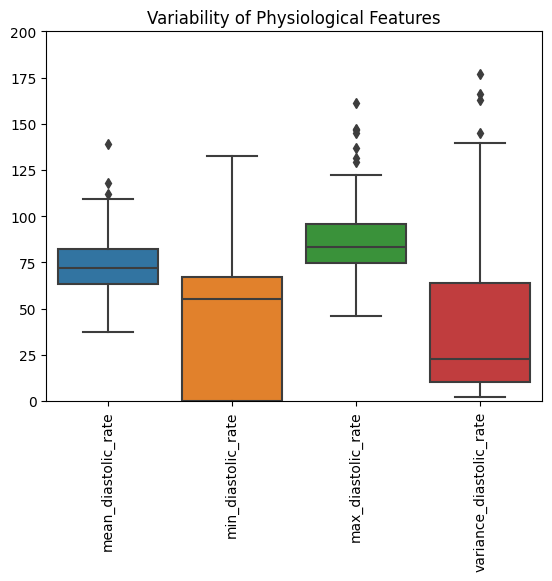

In [14]:
sns.boxplot(data=data)
plt.title('Variability of Physiological Features')
plt.xticks(rotation=90)
plt.ylim(0, 200)
plt.show()

In [100]:
def classification(df):

    # Assuming X contains the features and y contains the target variable
    X = df.drop(['class', 'Subject ID'], axis=1)
    y = df['class']

    kf = KFold(n_splits=10, shuffle=True, random_state=42)

    # Initialize lists to store metrics for each fold
    conf_matrices = []
    precisions = []
    recalls = []
    f1s = []

    # Create a Random Forest classifier
    classifier = RandomForestClassifier()

    # Perform 10-fold cross-validation
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        classifier.fit(X_train, y_train)
        predicted = classifier.predict(X_test)
        
        # Compute confusion matrix
        conf_matrix = confusion_matrix(y_test, predicted)
        conf_matrices.append(conf_matrix)
        
        # Compute precision, recall, and F1 score
        precision = precision_score(y_test, predicted, average='weighted')
        precisions.append(precision)
        
        recall = recall_score(y_test, predicted, average='weighted')
        recalls.append(recall)
        
        f1 = f1_score(y_test, predicted, average='weighted')
        f1s.append(f1)

    # Print metrics for each fold
    print("Confusion Matrix:")
    print(np.sum(conf_matrices,axis=0))
    print("Precision:", np.mean(precisions))
    print("Recall:", np.mean(recalls))
    print("F1 Score:", np.mean(f1s))


In [88]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

def classification_2(df):
    
    # Assuming X contains the features and y contains the target variable
    X = df.drop(['class', 'Subject ID'], axis=1)
    y = df['class']

    # Create a Random Forest classifier
    classifier = RandomForestClassifier()

    # Perform 10-fold cross-validation
    predicted = cross_val_predict(classifier, X, y, cv=10)

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y, predicted)

    # Compute precision, recall, and F1 score
    precision = precision_score(y, predicted, average='weighted')
    recall = recall_score(y, predicted, average='weighted')
    f1 = f1_score(y, predicted, average='weighted')

    # Print confusion matrix, precision, recall, and F1 score
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)


In [89]:
path = './Project2Data.csv'
df1 = preprocess_data(path,'dia')
df2 = preprocess_data(path,'sys')
df3 = preprocess_data(path,'res')
df4 = preprocess_data(path,'all')
df5 = preprocess_data(path,'eda')

  Subject ID    class  mean_diastolic_rate  min_diastolic_rate  \
0       F001  No Pain            37.457500             30.1804   
1       F001     Pain            48.864007              0.0000   
2       F002  No Pain           103.005014              0.0000   
3       F002     Pain            64.787237              0.0000   
4       F003  No Pain            74.741333             72.0597   

   max_diastolic_rate  variance_diastolic_rate  
0             46.2806                18.317190  
1             80.9625               336.893837  
2            121.4640                63.058863  
3             82.7646                38.336436  
4             77.4346                 1.994392  


In [91]:
print(df2.head())

  Subject ID    class  mean_systolic_rate  min_systolic_rate  \
0       F001  No Pain          103.809678            95.7038   
1       F001     Pain           95.306871             0.0000   
2       F002  No Pain          123.075133             0.0000   
3       F002     Pain          103.465102             0.0000   
4       F003  No Pain          111.274349           105.8750   

   max_systolic_rate  variance_systolic_rate  
0            112.070               14.791690  
1            123.621              333.820653  
2            127.963               20.957018  
3            123.680               73.680522  
4            114.233                4.482662  


In [92]:
print(df3.head())

  Subject ID    class  mean_respiration  min_respiration  max_respiration  \
0       F001  No Pain         14.520986          7.66186          19.9800   
1       F001     Pain         16.498897          6.53880          19.9468   
2       F002  No Pain         13.451838          6.85636          19.4238   
3       F002     Pain         15.131588          0.00000          19.9800   
4       F003  No Pain         13.716854          0.00000          19.9933   

   variance_respiration  
0             18.801835  
1             23.283224  
2              8.504615  
3             23.819373  
4             27.820794  


In [93]:
print(df4.head())

  Subject ID    class  mean_diastolic_rate  min_diastolic_rate  \
0       F001  No Pain            37.457500             30.1804   
1       F001     Pain            48.864007              0.0000   
2       F002  No Pain           103.005014              0.0000   
3       F002     Pain            64.787237              0.0000   
4       F003  No Pain            74.741333             72.0597   

   max_diastolic_rate  variance_diastolic_rate  mean_eda   min_eda   max_eda  \
0             46.2806                18.317190  3.909415  3.567500  4.313660   
1             80.9625               336.893837  1.879262 -0.010682  7.250980   
2            121.4640                63.058863  0.054713  0.015258  0.401305   
3             82.7646                38.336436  0.169672  0.015258  1.162720   
4             77.4346                 1.994392  3.891745  3.524780  4.331970   

   variance_eda  mean_systolic_rate  min_systolic_rate  max_systolic_rate  \
0      0.031057          103.809678          

In [94]:
print(df5.head())

  Subject ID    class  mean_eda   min_eda   max_eda  variance_eda
0       F001  No Pain  3.909415  3.567500  4.313660      0.031057
1       F001     Pain  1.879262 -0.010682  7.250980      6.971466
2       F002  No Pain  0.054713  0.015258  0.401305      0.001323
3       F002     Pain  0.169672  0.015258  1.162720      0.020781
4       F003  No Pain  3.891745  3.524780  4.331970      0.037484


In [102]:
classification(df1)
classification(df2)
classification(df3)
classification(df4)
classification(df5)

C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
[[43 17]
 [22 38]]
Precision: 0.6918007455507456
Recall: 0.675
F1 Score: 0.6633063382695734
Confusion Matrix:
[[41 19]
 [20 40]]
Precision: 0.7036904761904762
Recall: 0.6749999999999999
F1 Score: 0.6829601389895507
Confusion Matrix:
[[32 28]
 [32 28]]
Precision: 0.5938955026455026
Recall: 0.5
F1 Score: 0.5064224664224664
Confusion Matrix:
[[43 17]
 [16 44]]
Precision: 0.7501455026455026
Recall: 0.7249999999999999
F1 Score: 0.7258177129887657
Confusion Matrix:
[[30 30]
 [21 39]]
Precision: 0.6329662698412698
Recall: 0.575
F1 Score: 0.5762610156727803


In [103]:
classification_2(df1)
classification_2(df2)
classification_2(df3)
classification_2(df4)
classification_2(df5)

Confusion Matrix:
[[41 19]
 [21 39]]
Precision: 0.6668520578420467
Recall: 0.6666666666666666
F1 Score: 0.6665740483467629
Confusion Matrix:
[[47 13]
 [19 41]]
Precision: 0.7356902356902357
Recall: 0.7333333333333333
F1 Score: 0.7326649958228906
Confusion Matrix:
[[29 31]
 [30 30]]
Precision: 0.49166435120866914
Recall: 0.49166666666666664
F1 Score: 0.4916313632891173
Confusion Matrix:
[[46 14]
 [16 44]]
Precision: 0.75027808676307
Recall: 0.75
F1 Score: 0.7499305362600722
Confusion Matrix:
[[32 28]
 [25 35]]
Precision: 0.5584795321637427
Recall: 0.5583333333333333
F1 Score: 0.5580571190327288
